In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency, skew, spearmanr, pearsonr

#SMOTE
from imblearn.over_sampling import SMOTE

#Mô hình XG Boost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

#Random Forest
from sklearn.ensemble import RandomForestClassifier

import joblib

**PREPROCESSING**

In [3]:
df1 = pd.read_excel('/content/drive/MyDrive/Datasets/Leading Indian Bank/Internal_Bank_Dataset.xlsx')
df1

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [4]:
df2 = pd.read_excel('/content/drive/MyDrive/Datasets/Leading Indian Bank/External_Cibil_Dataset.xlsx')
df2

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [5]:
#Cả df1 lẫn df2 Có một số cột có quá nhiều giá trị ngoại lệ (-99999). Cột nào có nhiều hơn 10000 giá trị ngoại lệ sẽ bị loại ngay
def remove_ouliers(df):
  columns_to_be_removed = []
  for i in df.columns:
    if df.loc[df[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)

  df = df.drop(columns_to_be_removed, axis =1)
  #Sau khi xóa bớt các columns chứa nhiều giá trị ouliers, ta sẽ xóa đi giá trị ouliers ở các columns còn lại:
  df = df.loc[~(df == -99999).any(axis=1)]
  return df

In [6]:
df1 = remove_ouliers(df1)
df2 = remove_ouliers(df2)

In [7]:
#In ra xem có bao nhiêu cột trong data_1 trùng với data_2
for i in df1.columns:
    if i in df2.columns:
        print(i)

PROSPECTID


In [8]:
#Hợp nhất df1 và df2 bằng inner join, thông qua 'PROSPECTID' làm khóa chính,
data = pd.merge(df1, df2, how='inner', left_on=['PROSPECTID'], right_on=['PROSPECTID'])
data

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


**CHECKING**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [ ]:
data.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12

In [ ]:
chunk_size = 10
for i in range(0, len(data.columns), chunk_size):
    chunk_cols = data.columns[i: i + chunk_size]
    print(data[chunk_cols].describe())

         PROSPECTID      Total_TL  Tot_Closed_TL  Tot_Active_TL  \
count  42064.000000  42064.000000   42064.000000   42064.000000   
mean   25649.827477      5.262980       2.967383       2.295597   
std    14844.173396      7.463383       6.141098       2.404086   
min        1.000000      1.000000       0.000000       0.000000   
25%    12776.750000      1.000000       0.000000       1.000000   
50%    25706.500000      3.000000       1.000000       2.000000   
75%    38518.250000      6.000000       3.000000       3.000000   
max    51336.000000    235.000000     216.000000      47.000000   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
count         42064.000000        42064.00000     42064.000000   
mean              0.812643            0.48992         0.179032   
std               1.383559            1.05892         0.278043   
min               0.000000            0.00000         0.000000   
25%               0.000000            0.00000         0.000000   


**FEATURES SELECTION**

In [9]:
Flag_mapping = {'P1': 0, 'P2': 1, 'P3': 2, 'P4': 3}
data['Approved_Flag'] = data['Approved_Flag'].map(Flag_mapping)

***Pearson correlation Để kiểm tra độ tuyến tính của dataset:***

*Chỉ có một số columns có tuyến tính khá cao với output, mô hình này thiên về Phi tuyến*

In [10]:
pearson_cols = data.select_dtypes(include=['number']).columns
pearson_cols = pearson_cols.drop(['Approved_Flag'])

for i in pearson_cols:
  corr, _ = pearsonr(data[i], data['Approved_Flag'])
  print(f"Pearson Correlation of column {i}:", corr)

Pearson Correlation of column PROSPECTID: -0.009498264583001252
Pearson Correlation of column Total_TL: -0.10958067542445979
Pearson Correlation of column Tot_Closed_TL: -0.11681441843564364
Pearson Correlation of column Tot_Active_TL: -0.041792941867112236
Pearson Correlation of column Total_TL_opened_L6M: 0.12317404554958986
Pearson Correlation of column Tot_TL_closed_L6M: 0.006591768094534275
Pearson Correlation of column pct_tl_open_L6M: 0.2269021261161186
Pearson Correlation of column pct_tl_closed_L6M: 0.06722150090152484
Pearson Correlation of column pct_active_tl: 0.11855060136269668
Pearson Correlation of column pct_closed_tl: -0.1185506013626967
Pearson Correlation of column Total_TL_opened_L12M: 0.0745521687809882
Pearson Correlation of column Tot_TL_closed_L12M: -0.02644684333349157
Pearson Correlation of column pct_tl_open_L12M: 0.21973605394992393
Pearson Correlation of column pct_tl_closed_L12M: 0.059519859724834895
Pearson Correlation of column Tot_Missed_Pmnt: -0.02824

***Spearman correlation cho các columns Number:***

In [11]:
spearman_cols = data.select_dtypes(include=['number']).columns
spearman_df = data[spearman_cols]
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in spearman_df.columns:
  if col == 'Approved_Flag':
    continue
  else:
    if spearman_df[col].nunique() > 1:
      corr, p_value = spearmanr(spearman_df[col], spearman_df['Approved_Flag'])
      correlation_results.append((col, corr, p_value))
    else:
        print(f"Cột {col} có giá trị không thay đổi và bị bỏ qua.")

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

,Feature,Spearman Correlation,p-value
57,enq_L3m,0.510440,0.0
56,enq_L6m,0.477348,0.0
55,enq_L12m,0.424225,0.0
52,PL_enq_L6m,0.386602,0.0
68,pct_PL_enq_L6m_of_ever,0.384156,0.0
...,...,...,...
36,num_std_12mts,-0.306412,0.0
34,num_std,-0.316856,0.0
24,Age_Oldest_TL,-0.391228,0.0
54,time_since_recent_enq,-0.405574,0.0


In [12]:
spearman_remove_ls=[]

for i in correlation_df.index:
  if -0.13 < correlation_df.loc[i, 'Spearman Correlation'] < 0.13:
    spearman_remove_ls.append(correlation_df.loc[i, 'Feature'])
print(spearman_remove_ls)

['Consumer_TL', 'pct_opened_TLs_L6m_of_L12m', 'Total_TL_opened_L6M', 'num_times_30p_dpd', 'CC_enq', 'num_deliq_6_12mts', 'num_deliq_12mts', 'Total_TL_opened_L12M', 'num_times_60p_dpd', 'pct_tl_closed_L6M', 'Unsecured_TL', 'num_deliq_6mts', 'pct_tl_closed_L12M', 'Tot_TL_closed_L6M', 'num_lss_6mts', 'num_lss_12mts', 'PROSPECTID', 'num_dbt_6mts', 'num_dbt_12mts', 'num_sub_6mts', 'Tot_Missed_Pmnt', 'CC_Flag', 'CC_TL', 'num_lss', 'num_sub_12mts', 'PL_Flag', 'num_dbt', 'PL_TL', 'Tot_TL_closed_L12M', 'NETMONTHLYINCOME', 'pct_currentBal_all_TL', 'time_since_recent_payment', 'num_sub', 'Tot_Active_TL', 'HL_Flag', 'Gold_TL', 'Age_Newest_TL']


***Kiểm định Chi-Squared cho các columns Object:***

In [13]:
obj_cols = data.select_dtypes(include=['object'])
remove_chi_ls=[]

for i in obj_cols.columns:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(obj_cols[i], data['Approved_Flag']))
    print(i, '---', pval)
    if pval < 0.05:
      continue
    else:
      remove_chi_ls.append(i)
print(remove_chi_ls)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287
[]


In [14]:
data = data.drop(columns = remove_chi_ls + spearman_remove_ls)

In [15]:
data.columns

Index(['Total_TL', 'Tot_Closed_TL', 'pct_tl_open_L6M', 'pct_active_tl',
       'pct_closed_tl', 'pct_tl_open_L12M', 'Auto_TL', 'Home_TL', 'Secured_TL',
       'Other_TL', 'Age_Oldest_TL', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_std', 'num_std_6mts', 'num_std_12mts',
       'recent_level_of_deliq', 'tot_enq', 'CC_enq_L6m', 'CC_enq_L12m',
       'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq',
       'enq_L12m', 'enq_L6m', 'enq_L3m', 'MARITALSTATUS', 'EDUCATION', 'AGE',
       'GENDER', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m',
       'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'GL_Flag',
       'last_prod_enq2', 'first_prod_enq2', 'Credit_Score', 'Approved_Flag'],
      dtype='object')

**ENCODING**

In [ ]:
#Hàm encoding cho một số columns objects:
def map_columns(data, column_names=['MARITALSTATUS', 'EDUCATION','GENDER', 'last_prod_enq2', 'first_prod_enq2']):

    # Các ánh xạ giá trị cho các cột khác nhau
    MARITALSTATUS_mapping = {'Married': 0, 'Single': 1}

    EDUCATION_mapping = {'OTHERS': 0, 'SSC': 1, '12TH': 2, 'UNDER GRADUATE': 3, 'GRADUATE': 4, 'POST-GRADUATE': 5, 'PROFESSIONAL': 6}

    GENDER_mapping = {'M': 0, 'F': 1}

    last_prod_enq2_mapping = {'others': 0, 'ConsumerLoan': 1, 'AL': 2, 'PL': 3, 'CC': 4, 'HL': 4}

    first_prod_enq2_mapping = {'others': 0, 'ConsumerLoan': 1, 'AL': 2, 'PL': 3, 'CC': 4, 'HL': 4}

    # Thực hiện ánh xạ cho từng cột trong DataFrame
    mappings = {
        'MARITALSTATUS': MARITALSTATUS_mapping, 'EDUCATION': EDUCATION_mapping, 'GENDER': GENDER_mapping,
        'last_prod_enq2': last_prod_enq2_mapping, 'first_prod_enq2': first_prod_enq2_mapping}

    for column in column_names:
        if column in data.columns and column in mappings:
            data[column] = data[column].map(mappings[column])

    return data
map_columns(data)

In [17]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Total_TL,Tot_Closed_TL,pct_tl_open_L6M,pct_active_tl,pct_closed_tl,pct_tl_open_L12M,Auto_TL,Home_TL,Secured_TL,Other_TL,Age_Oldest_TL,num_times_delinquent,max_recent_level_of_deliq,num_std,num_std_6mts,num_std_12mts,recent_level_of_deliq,tot_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
Total_TL,1.000000,0.956023,-0.062464,-0.272108,0.272108,-0.154539,0.239186,0.120286,0.890554,0.544622,0.376021,0.297974,0.151233,0.465188,0.348611,0.376594,0.100493,0.362608,0.103826,0.128981,0.240098,0.094067,0.128931,-0.072601,0.185516,0.140815,0.100230,-0.107393,0.039283,0.135590,-0.015019,0.054753,-0.272108,0.064139,0.102004,0.020749,0.075026,0.108299,0.063096,0.048684,0.198477,-0.109581
Tot_Closed_TL,0.956023,1.000000,-0.135335,-0.393123,0.393123,-0.232311,0.194706,0.088577,0.926682,0.471154,0.373822,0.296586,0.153205,0.421587,0.281910,0.314541,0.104736,0.245456,0.048326,0.063545,0.161805,0.037658,0.060590,-0.014448,0.082976,0.058868,0.042070,-0.106651,0.022840,0.141432,-0.009446,0.058819,-0.393123,0.016964,0.052815,-0.018390,0.032148,0.078980,0.038237,0.038122,0.202856,-0.116814
pct_tl_open_L6M,-0.062464,-0.135335,1.000000,0.329938,-0.329938,0.579781,-0.116968,-0.054639,-0.117467,-0.022943,-0.278362,-0.120899,-0.075640,-0.123119,-0.057192,-0.093956,-0.068905,0.123698,0.132246,0.101807,0.131579,0.253982,0.217817,-0.237121,0.286970,0.350700,0.241228,0.114857,0.013378,-0.150382,-0.002590,-0.087380,0.329938,0.278674,0.142731,0.296453,0.153742,-0.056438,0.039069,0.045709,-0.254776,0.226902
pct_active_tl,-0.272108,-0.393123,0.329938,1.000000,-1.000000,0.494852,-0.094212,-0.008667,-0.283526,-0.136525,-0.400486,-0.137605,-0.107027,-0.139720,-0.029761,-0.059345,-0.093172,-0.021514,0.041779,0.043494,-0.017257,0.043243,0.046961,-0.184050,0.103752,0.085825,0.059979,0.116958,0.007273,-0.152037,0.007772,-0.067914,1.000000,0.066535,0.035311,0.085416,0.039895,0.001389,0.010726,0.017092,-0.177621,0.118551
pct_closed_tl,0.272108,0.393123,-0.329938,-1.000000,1.000000,-0.494852,0.094212,0.008667,0.283526,0.136525,0.400486,0.137605,0.107027,0.139720,0.029761,0.059345,0.093172,0.021514,-0.041779,-0.043494,0.017257,-0.043243,-0.046961,0.184050,-0.103752,-0.085825,-0.059979,-0.116958,-0.007273,0.152037,-0.007772,0.067914,-1.000000,-0.066535,-0.035311,-0.085416,-0.039895,-0.001389,-0.010726,-0.017092,0.177621,-0.118551
pct_tl_open_L12M,-0.154539,-0.232311,0.579781,0.494852,-0.494852,1.000000,-0.176611,-0.085022,-0.206847,-0.092290,-0.475219,-0.196241,-0.125228,-0.199052,-0.095425,-0.134357,-0.115297,0.079016,0.097838,0.096868,0.089017,0.180546,0.197523,-0.319344,0.308631,0.251479,0.186967,0.141539,-0.006358,-0.203564,0.034701,-0.121199,0.494852,0.188660,0.093373,0.213764,0.107904,-0.084636,0.040146,0.022202,-0.286715,0.219736
Auto_TL,0.239186,0.194706,-0.116968,-0.094212,0.094212,-0.176611,1.000000,0.043421,0.229687,0.080597,0.359564,0.201174,0.088517,0.109639,0.095860,0.096498,0.062818,0.244213,0.028473,0.041389,0.041360,-0.018097,-0.016037,0.053084,0.049039,0.020917,0.006693,-0.055799,0.008942,0.075392,-0.106392,0.078256,-0.094212,-0.031415,0.025098,-0.050010,0.009646,0.032625,-0.066225,-0.147826,0.180297,-0.135898
Home_TL,0.120286,0.088577,-0.054639,-0.008667,0.008667,-0.085022,0.043421,1.000000,0.110888,0.073968,0.239722,0.104017,0.040083,0.206967,0.196163,0.201985,0.032258,0.094248,0.006281,0.014864,0.051789,-0.015439,-0.011180,0.018307,-0.005438,-0.015762,-0.015637,-0.077330,0.078827,0.156472,0.000256,0.108468,-0.008667,-0.022779,0.012301,-0.035480,0.005158,0.868210,0.117959,0.219671,0.185126,-0.131988
Secured_TL,0.890554,0.926682,-0.117467,-0.283526,0.283526,-0.206847,0.229687,0.110888,1.000000,0.467281,0.326919,0.307884,0.159390,0.475520,0.354181,0.383303,0.107524,0

In [18]:
#Lọc ra các cặp có giá trị corr > 0.5
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

high_corr_pairs = corr_pairs[corr_pairs > 0.5]
high_corr_pairs = high_corr_pairs.iloc[::2]

In [19]:
#Lọc ra các giá trị corr giữa các biến đầu vào và output 'Approved_Flag'
corr_label = corr['Approved_Flag']

#Ở đây tiến hành các bước bao gồm: Kiểm tra các giá trị Corr cao trong ma trận:
  #Nếu là corr của biến đầu vào với label thì ta sẽ giữ lại
  #So sánh 2 biến có corr cao, nếu biến nào mà corr của nó với label thấp hơn thì sẽ được loại, ngược lại thì lưu
  #Việc này giúp 2 điều: Xóa đi 1 giá trị trong cặp biến có Corr lớn, và xóa đi giá trị ít tác động đến đầu ra

columns_to_remove = []
for col1, col2 in high_corr_pairs.index:
  if col1 == 'Approved_Flag' or col2 == 'Approved_Flag':
    continue
  else:
    # So sánh giá trị trong corr_label và chọn cột có giá trị thấp hơn để xóa
    if corr_label[col1] < corr_label[col2]:
        columns_to_remove.append(col1)
    else:
        columns_to_remove.append(col2)

columns_to_remove = list(set(columns_to_remove))
print(columns_to_remove)

['Home_TL', 'CC_enq_L12m', 'tot_enq', 'pct_PL_enq_L6m_of_L12m', 'PL_enq_L12m', 'CC_enq_L6m', 'Credit_Score', 'pct_tl_open_L12M', 'num_std_12mts', 'PL_enq_L6m', 'pct_CC_enq_L6m_of_L12m', 'num_std', 'pct_CC_enq_L6m_of_ever', 'Other_TL', 'enq_L6m', 'enq_L12m', 'Secured_TL', 'PL_enq', 'Tot_Closed_TL', 'max_recent_level_of_deliq']


In [20]:
#Dữ liệu sau khi hoàn tất việc tiền xử lý:
data = data.drop(columns = columns_to_remove)
data

,Total_TL,pct_tl_open_L6M,pct_active_tl,pct_closed_tl,Auto_TL,Age_Oldest_TL,num_times_delinquent,num_std_6mts,recent_level_of_deliq,time_since_recent_enq,...,EDUCATION,AGE,GENDER,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_PL_enq_L6m_of_ever,GL_Flag,last_prod_enq2,first_prod_enq2,Approved_Flag
0,5,0.000,0.200,0.800,0,72,11,5,29,566,...,2,48,0,114,0.200,0.000,0,3,3,1
1,1,0.000,1.000,0.000,0,7,0,0,0,209,...,4,23,1,50,1.000,0.000,0,1,1,1
2,8,0.125,1.000,0.000,1,47,9,5,25,587,...,1,40,0,191,1.000,0.000,0,1,0,1
3,3,0.000,0.333,0.667,1,131,0,4,0,3951,...,5,48,0,75,0.333,0.000,0,2,2,0
4,6,0.000,0.167,0.833,4,150,14,0,26,7,...,2,35,0,154,0.167,0.429,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,3,0.333,1.000,0.000,0,24,2,0,24,0,...,2,43,0,249,1.000,0.000,0,1,1,3
42060,4,0.000,0.500,0.500,2,74,0,4,0,203,...,1,31,0,186,0.500,0.000,0,0,0,0
42061,2,0.500,0.500,0.500,0,9,0,0,0,1,...,1,28,0,66,0.500,1.000,0,1,0,2
42062,2,0.000,0.500,0.500,0,15,0,0,0,242,...,3,25,1,54,0.500,0.000,0,1,0,1


In [23]:
for i in data.columns:
  print(data[i].value_counts())
  print('\n')

Total_TL
1     11441
2      7747
3      5095
4      3587
5      2593
      ...  
78        1
97        1
86        1
83        1
95        1
Name: count, Length: 103, dtype: int64


pct_tl_open_L6M
0.000    24160
0.500     3286
1.000     2196
0.333     2008
0.250     1324
         ...  
0.478        1
0.407        1
0.189        1
0.923        1
0.177        1
Name: count, Length: 280, dtype: int64


pct_active_tl
1.000    13978
0.000     6043
0.500     5148
0.667     2383
0.333     2089
         ...  
0.177        1
0.047        1
0.268        1
0.439        1
0.106        1
Name: count, Length: 416, dtype: int64


pct_closed_tl
0.000    13978
1.000     6043
0.500     5148
0.333     2383
0.667     2089
         ...  
0.823        1
0.953        1
0.732        1
0.561        1
0.894        1
Name: count, Length: 416, dtype: int64


Auto_TL
0     22258
1     14503
2      3621
3      1033
4       369
5       140
6        67
7        34
8        11
9         8
11        5
13        4
12  

**EDA**

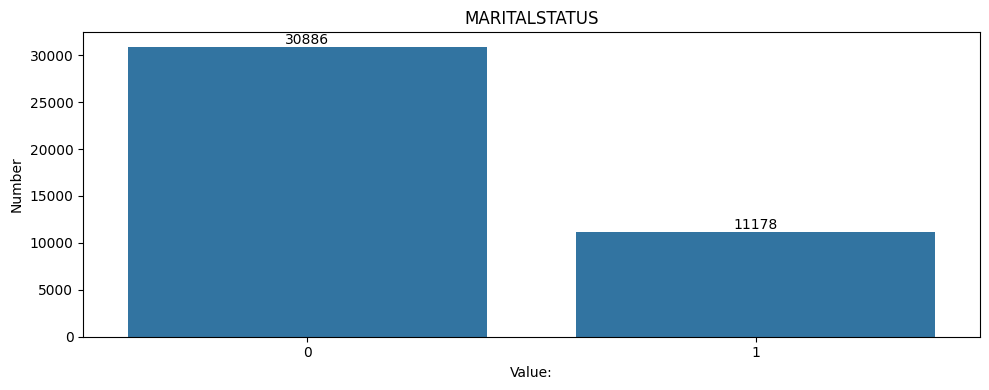

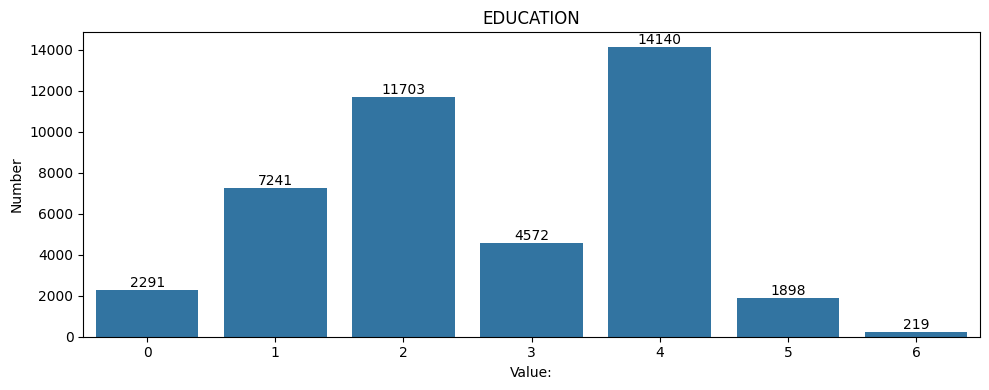

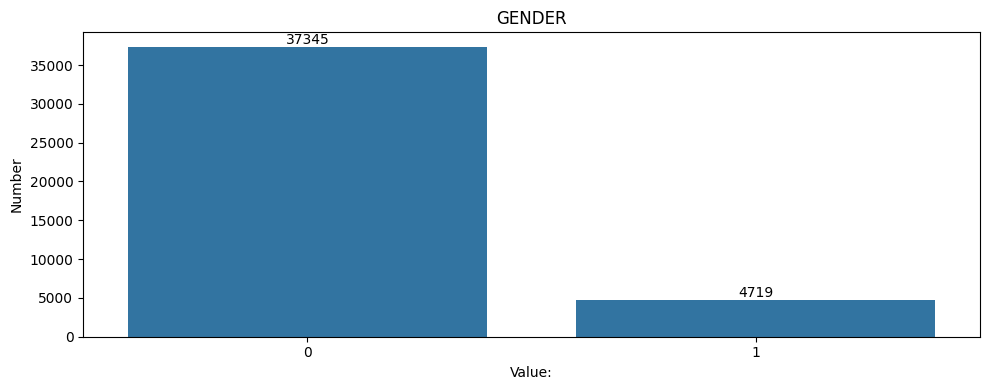

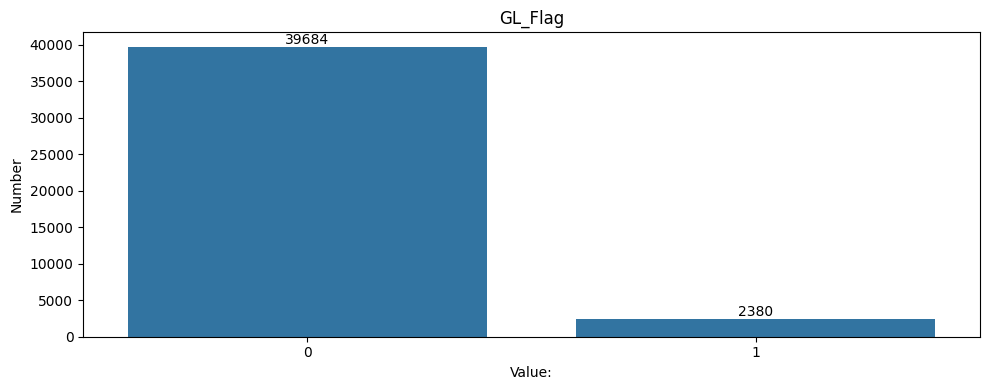

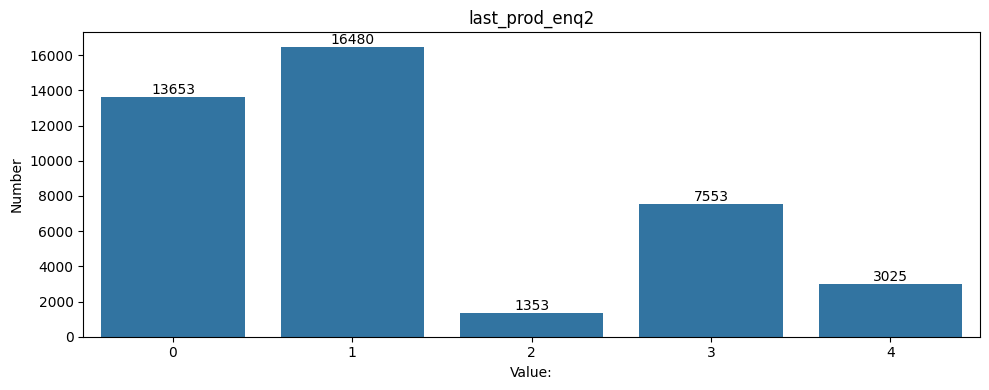

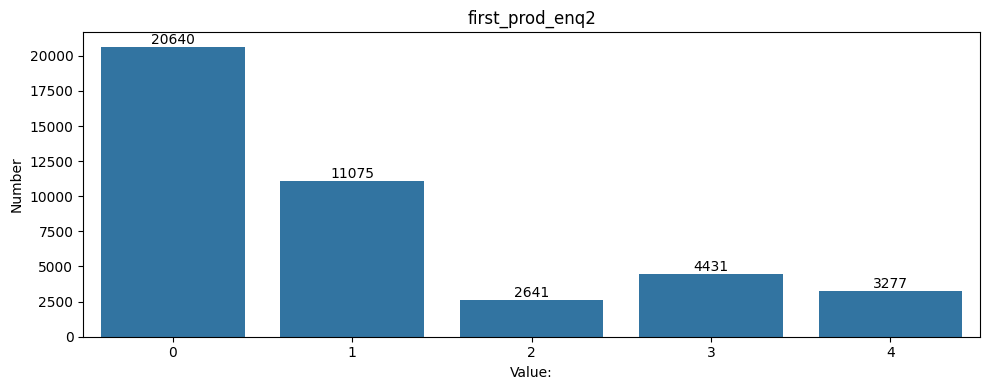

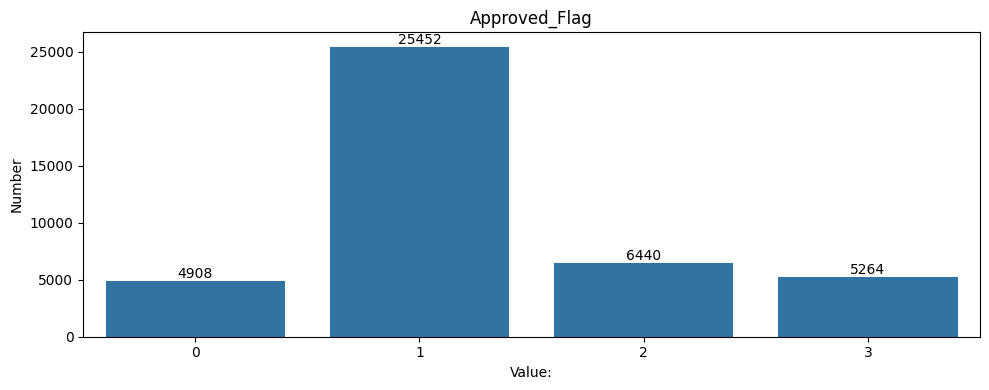

In [30]:
bar_ls = ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'GL_Flag', 'last_prod_enq2', 'first_prod_enq2', 'Approved_Flag']

for i in bar_ls:
  plt.figure(figsize=(10,4))
  ax1 = sns.barplot(x=data[i].value_counts().index, y=data[i].value_counts())
  ax1.set_xlabel('Value:')
  ax1.set_ylabel('Number')
  ax1.set_title(i)
  for container in ax1.containers:
    ax1.bar_label(container)
  plt.tight_layout()
  plt.show()

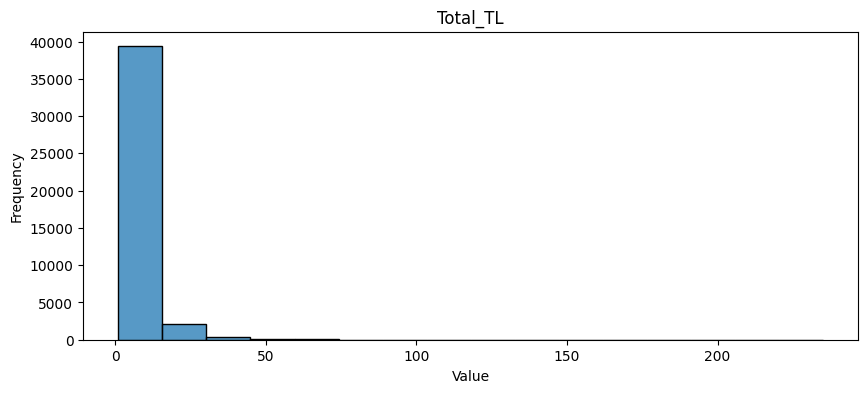

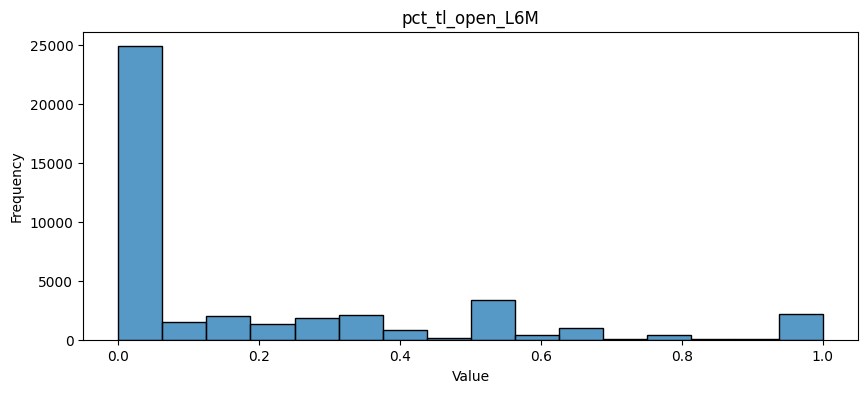

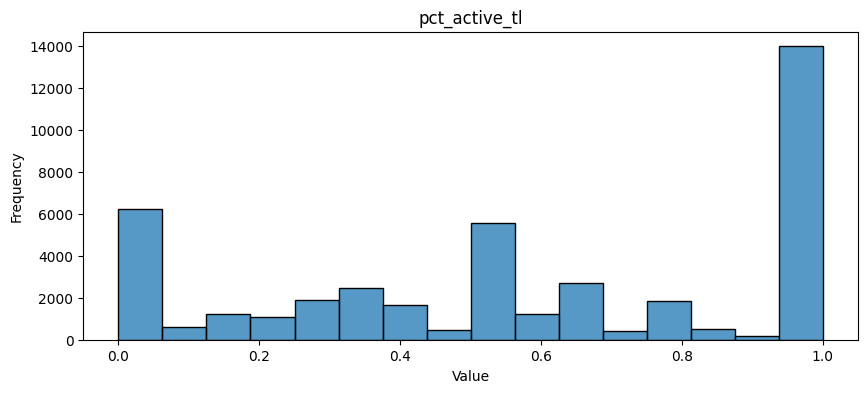

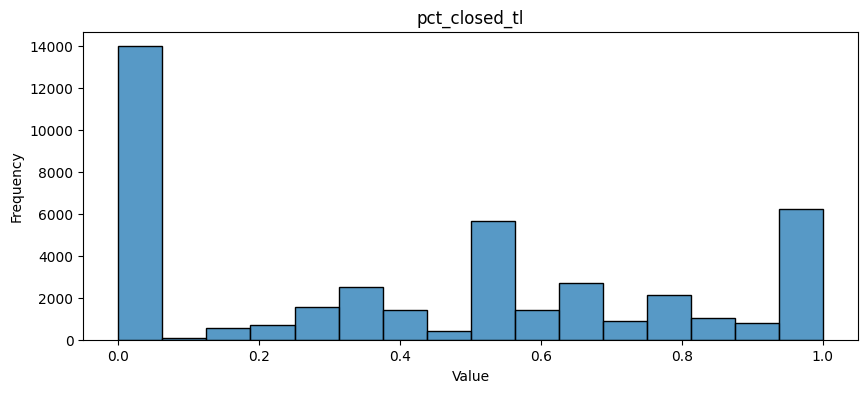

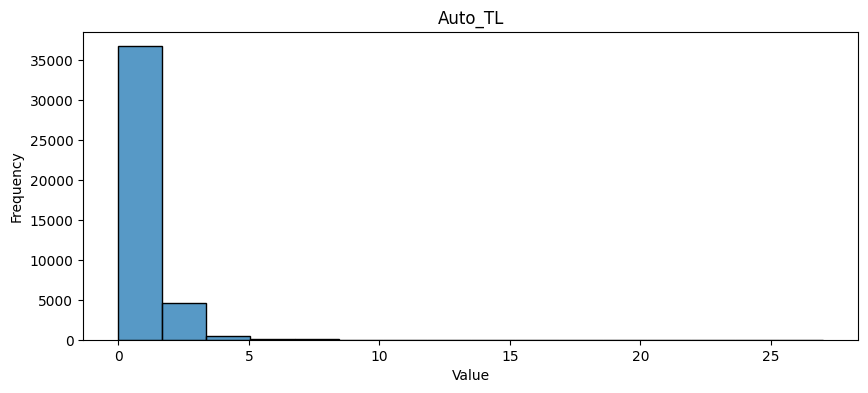

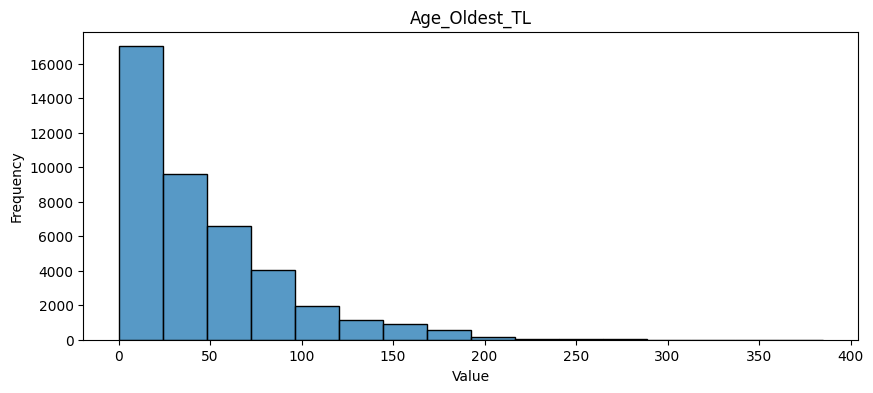

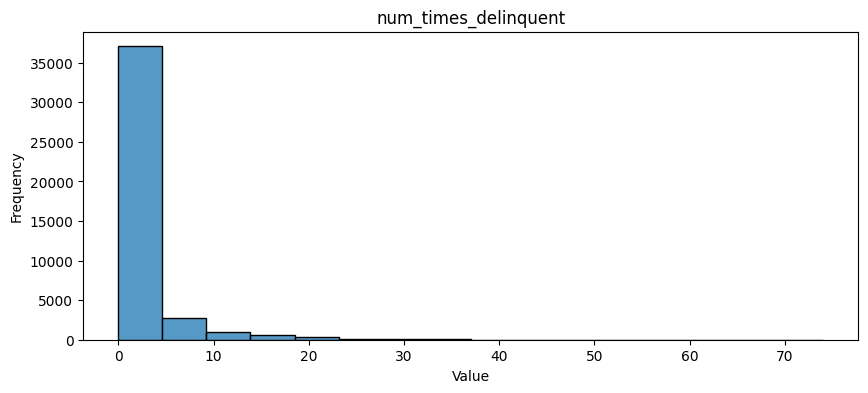

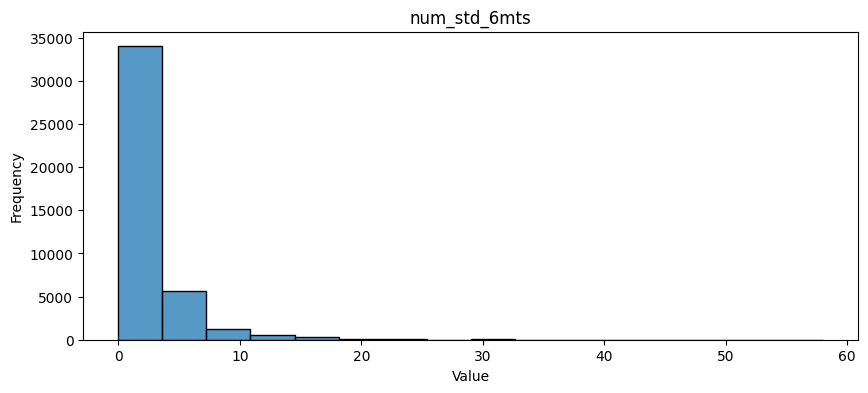

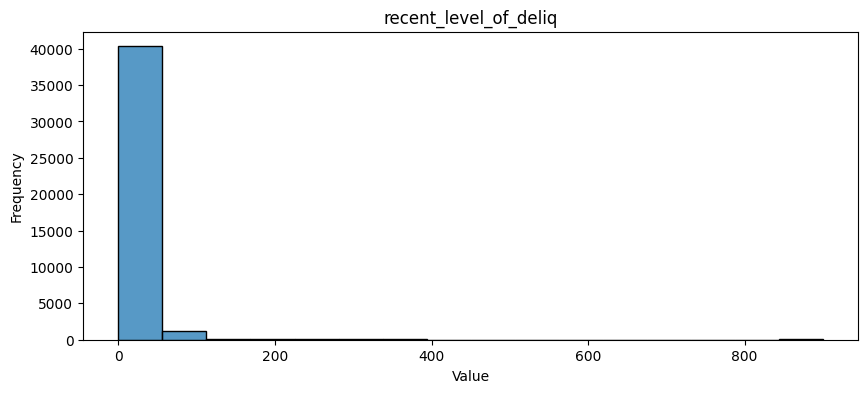

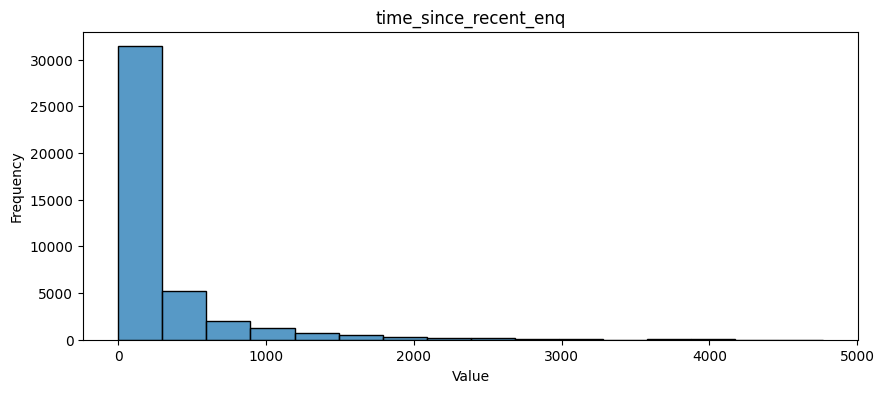

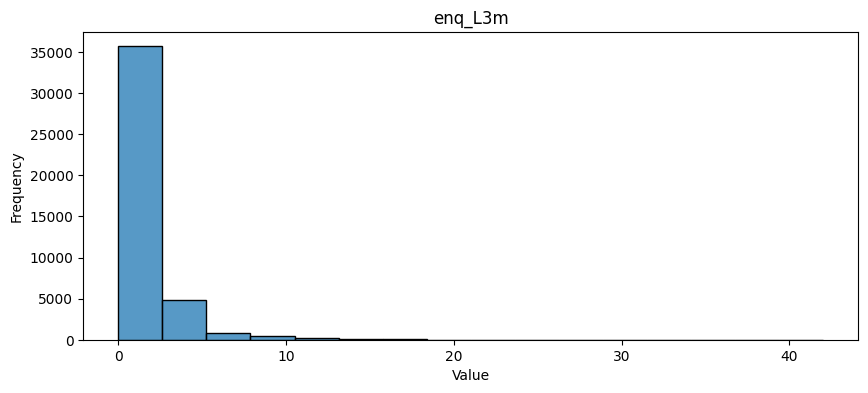

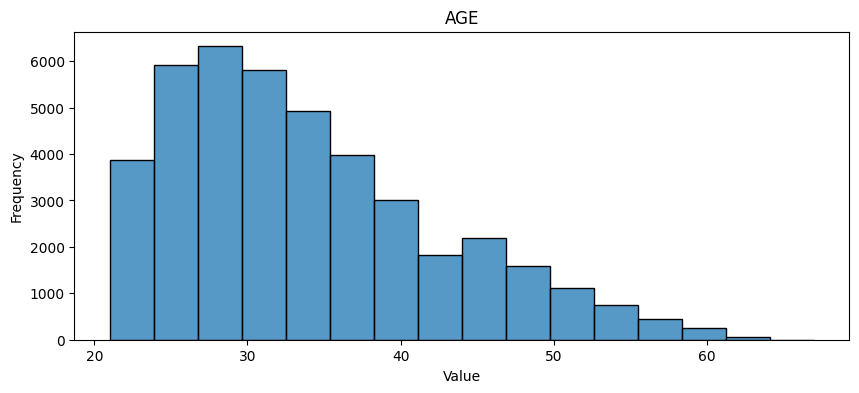

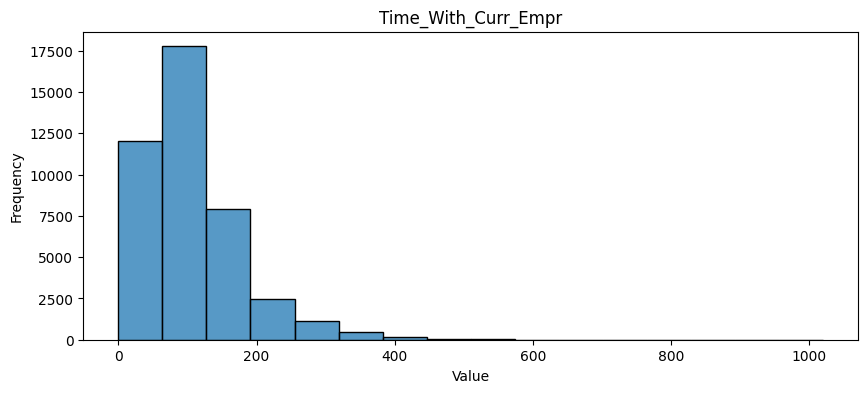

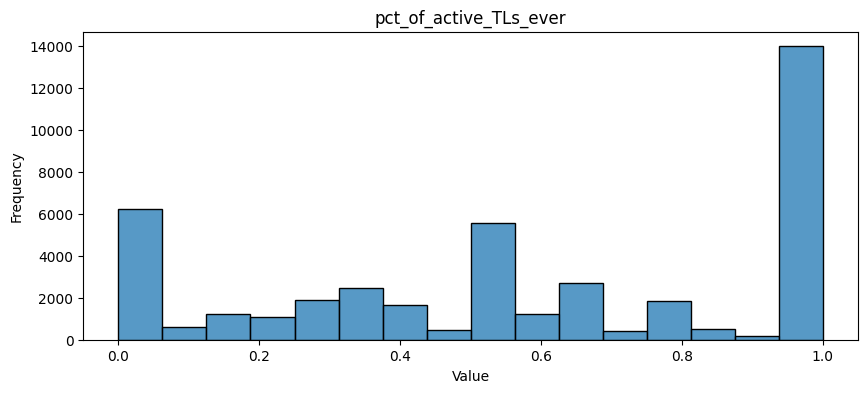

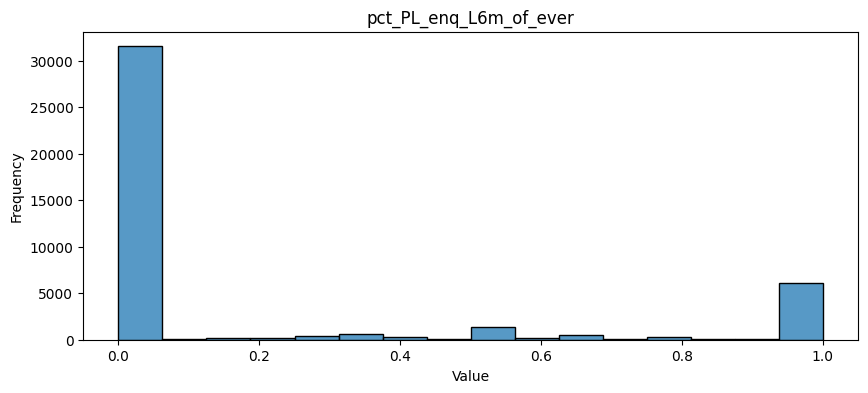

In [32]:
hist_ls = ['Total_TL', 'pct_tl_open_L6M', 'pct_active_tl', 'pct_closed_tl', 'Auto_TL', 'Age_Oldest_TL',
           'num_times_delinquent', 'num_std_6mts', 'recent_level_of_deliq', 'time_since_recent_enq',
           'enq_L3m', 'AGE', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever', 'pct_PL_enq_L6m_of_ever']
for i in hist_ls:
  plt.figure(figsize=(10,4))
  ax2 = sns.histplot(data[i], bins=16)
  ax2.set_xlabel('Value')
  ax2.set_ylabel('Frequency')
  ax2.set_title(i)

**PREDICTION**

In [ ]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

In [ ]:
#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data.drop(columns=['Approved_Flag'], axis=1)
    features = X.columns

    y = data['Approved_Flag']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # MinMax Scaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

***1.RANDOM FOREST***

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(data)

model_RF = RandomForestClassifier(n_estimators=200, random_state=42)
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3894
           1       1.00      1.00      1.00     20407
           2       1.00      1.00      1.00      5115
           3       1.00      1.00      1.00      4235

    accuracy                           1.00     33651
   macro avg       1.00      1.00      1.00     33651
weighted avg       1.00      1.00      1.00     33651

              precision    recall  f1-score   support

           0       0.82      0.71      0.77      1014
           1       0.80      0.92      0.86      5045
           2       0.42      0.22      0.29      1325
           3       0.70      0.72      0.71      1029

    accuracy                           0.76      8413
   macro avg       0.69      0.64      0.66      8413
weighted avg       0.73      0.76      0.74      8413



***2.XGBOOST***

In [ ]:
#XGBOOST
X_train, X_test, y_train, y_test = preprocess_data(data)

model_XGB = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3894
           1       0.88      0.96      0.92     20407
           2       0.75      0.53      0.62      5115
           3       0.90      0.85      0.87      4235

    accuracy                           0.87     33651
   macro avg       0.86      0.81      0.83     33651
weighted avg       0.87      0.87      0.86     33651

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1014
           1       0.81      0.91      0.86      5045
           2       0.46      0.29      0.35      1325
           3       0.72      0.72      0.72      1029

    accuracy                           0.77      8413
   macro avg       0.70      0.66      0.68      8413
weighted avg       0.75      0.77      0.75      8413



***4.SMOTE***

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(data)
class_counts = y_train.value_counts()

smote = SMOTE(sampling_strategy={0: class_counts[1], 2: class_counts[1], 3: class_counts[1]}, random_state=42)

# Áp dụng SMOTE để tăng cường các lớp 0, 2, và 3
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [ ]:
model_XGB_3 = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)
model_XGB_3.fit(X_train_resample, y_train_resample)

y_train_pred = model_XGB_3.predict(X_train_resample)
y_test_pred = model_XGB_3.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     20407
           1       0.88      0.93      0.90     20407
           2       0.88      0.82      0.85     20407
           3       0.92      0.91      0.92     20407

    accuracy                           0.91     81628
   macro avg       0.91      0.91      0.91     81628
weighted avg       0.91      0.91      0.91     81628

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1014
           1       0.83      0.88      0.85      5045
           2       0.44      0.32      0.37      1325
           3       0.71      0.71      0.71      1029

    accuracy                           0.76      8413
   macro avg       0.68      0.67      0.68      8413
weighted avg       0.74      0.76      0.75      8413



***5.Kết hợp SMOTE với Gridsearch***

In [ ]:
param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10,50,100]
}

index = 0

answers_grid = {
    'combination'       :[],
    'train_Accuracy'    :[],
    'test_Accuracy'     :[],
    'colsample_bytree'  :[],
    'learning_rate'     :[],
    'max_depth'         :[],
    'alpha'             :[],
    'n_estimators'      :[]

    }

# Lặp qua tất cả các kết hợp của các siêu tham số
for colsample in param_grid['colsample_bytree']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for alpha in param_grid['alpha']:
                for n_estimators in param_grid['n_estimators']:

                    # Tạo mô hình với các siêu tham số hiện tại
                    model_XGB_2 = xgb.XGBClassifier(
                        colsample_bytree=colsample,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        alpha=alpha,
                        n_estimators=n_estimators,
                        objective='multi:softmax', # Giả sử bài toán phân loại đa lớp
                        num_class=4 # Điều chỉnh cho phù hợp với số lớp của bạn
                    )

                    # Huấn luyện mô hình
                    model_XGB_2.fit(X_train_resample, y_train_resample)

                    # Đánh giá mô hình trên tập huấn luyện và tập kiểm tra
                    train_accuracy = model_XGB_2.score(X_train_resample, y_train_resample)
                    test_accuracy = model_XGB_2.score(X_test, y_test)

                    y_train_pred = model_XGB_2.predict(X_train_resample)
                    y_test_pred = model_XGB_2.predict(X_test)

                    # Lưu kết quả vào từ điển
                    answers_grid['combination'].append(index)
                    answers_grid['train_Accuracy'].append(train_accuracy)
                    answers_grid['test_Accuracy'].append(test_accuracy)
                    answers_grid['colsample_bytree'].append(colsample)
                    answers_grid['learning_rate'].append(learning_rate)
                    answers_grid['max_depth'].append(max_depth)
                    answers_grid['alpha'].append(alpha)
                    answers_grid['n_estimators'].append(n_estimators)

                    index += 1

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

# Chuyển từ điển kết quả thành DataFrame để dễ dàng phân tích
results_df = pd.DataFrame(answers_grid)
print(results_df)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     20407
           1       0.83      0.86      0.85     20407
           2       0.75      0.70      0.72     20407
           3       0.84      0.82      0.83     20407

    accuracy                           0.83     81628
   macro avg       0.83      0.83      0.83     81628
weighted avg       0.83      0.83      0.83     81628

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1014
           1       0.84      0.85      0.84      5045
           2       0.41      0.35      0.38      1325
           3       0.70      0.72      0.71      1029

    accuracy                           0.75      8413
   macro avg       0.67      0.68      0.67      8413
weighted avg       0.74      0.75      0.75      8413

     combination  train_Accuracy  test_Accuracy  colsample_bytree  \
0              0        0.640932       0.582789              